In [4]:
#pip install yfinance

In [3]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [5]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


In [6]:
#시간정보 loader train set 
samsung_train_df = samsung_df[:317]
samsung_train_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [7]:
# test set 5개를 예측해보자!
samsung_test_df = samsung_df[317:]
samsung_test_df

,price
day,
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0
2021-04-20,83900.0


In [26]:
#!pip install statsmodels==0.11.0rc1

!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from statsmodels.tsa.arima.model import ARIMA


In [28]:
import statsmodels.api as sm

ImportError: ignored

In [30]:
model = ARIMA(samsung_train_df.price.values, order=(2,1,2)) # order 안의 파라미터는 (AR, Difference, MA)
fit = model.fit()
fit.summary() # 생성 모델에 대한 summary 확인

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: enforce_invertibility, enforce_stationarity, concentrate_scale. After release 0.14, this will raise.
  def _fit(self, objective, gradient, start_params, fargs, kwargs,


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  317
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2696.573
Date:                Tue, 14 Mar 2023   AIC                           5403.147
Time:                        14:00:05   BIC                           5421.925
Sample:                             0   HQIC                          5410.649
                                - 317                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0700      2.009      0.035      0.972      -3.867       4.007
ar.L2          0.7255      1.795      0.404      0.686      -2.792       4.243
ma.L1         -0.0566      2.031     -0.028      0.978      -4.037       3.924
ma.L2         -0.7079      1.784     -0.397      0.692      -4.205       2.789
sigma2      1.538e+06   8.98e+04     17.121      0.000    1.36e+06    1.71e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                59.05
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.56
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

array([84004.17533258, 84012.96286752, 84016.60685038, 84023.23701988,
       84026.34456997, 84031.37207454, 84033.97831578, 84037.8080387 ,
       84039.96678195, 84042.89622412])

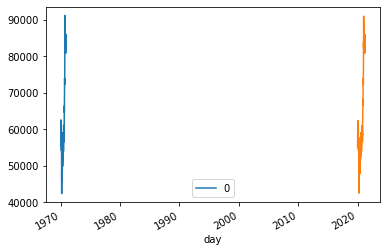

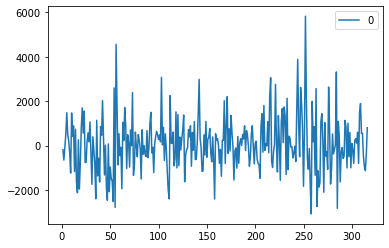

In [35]:
#시각화 시도 
import matplotlib.pyplot as plt
import pandas as pd
pred = pd.DataFrame(fit.predict())
pred[1:].plot()
samsung_train_df['price'].plot()


# 잔차 시각화
residuals = pd.DataFrame(fit.resid)
residuals[1:].plot()

# 이후 10일에 대한 주가 예측을 시도
fit.forecast(steps=10)

In [37]:

# 실제값 확인하기 
forecasts = yf.download('005930.KS',
                     start='2021-12-01',
                     end='2021-12-10')
print(forecasts['Close'].values)         

[*********************100%***********************]  1 of 1 completed
[74400. 75800. 75600. 76300. 77400. 77400. 78200.]
